In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import h5py
import numpy as np
import io_utils #custom wrapper for pytables

In [2]:
# Download the vector velocity data file that we need to run these examples
import os
vfilepath='20181231.007_lp_1min-fitcal-vvelsLat-60sec.h5'
if not os.path.exists(vfilepath):
    import urllib.request
    url='https://data.amisr.com/database/dbase_site_media/PFISR/Experiments/20181231.007/DataFiles/20181231.007_lp_1min-fitcal-vvelsLat-60sec.h5'

    print('Downloading data file...')
    urllib.request.urlretrieve(url,vfilepath)

    print('...Done!')

In [3]:
#Read velocity files into dictionaries
v=io_utils.read_whole_h5file(vfilepath)

In [4]:
times=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]
cgm_lat=0.5*(v['/VectorVels']['MagneticLatitude'][:,0]+v['/VectorVels']['MagneticLatitude'][:,1]) #average bin edges to get centers
#The Vest array is Nrecords x Nlatitudes x 3 (perp-North, perp-East, parallel)
vipn=v['/VectorVels']['Vest'][:,:,0]
dvipn=v['/VectorVels']['errVest'][:,:,0]
vipe=v['/VectorVels']['Vest'][:,:,1]
dvipe=v['/VectorVels']['errVest'][:,:,1]

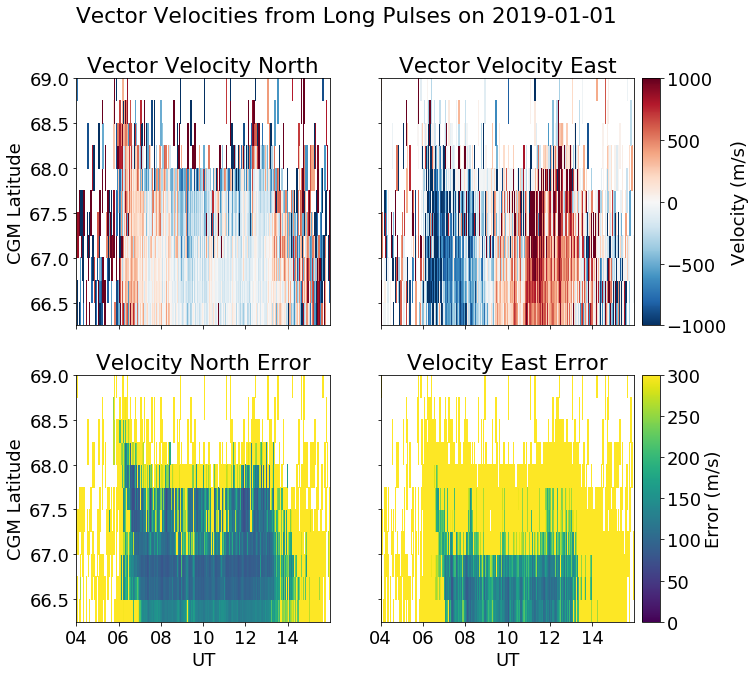

In [5]:
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size']=18
fig,axarr=plt.subplots(2,2,sharex=True,sharey=True)

vclrs=axarr[0,0].pcolormesh(mdates.date2num(times),cgm_lat,vipn.T,vmin=-1000,vmax=1000,cmap='RdBu_r',shading='nearest')
errclrs=axarr[1,0].pcolormesh(mdates.date2num(times),cgm_lat,dvipn.T,vmin=0,vmax=300,cmap='viridis',shading='nearest')

vclrs=axarr[0,1].pcolormesh(mdates.date2num(times),cgm_lat,vipe.T,vmin=-1000,vmax=1000,cmap='RdBu_r',shading='nearest')
errclrs=axarr[1,1].pcolormesh(mdates.date2num(times),cgm_lat,dvipe.T,vmin=0,vmax=300,cmap='viridis',shading='nearest')

axarr[-1,0].set_xlim([mdates.date2num(datetime.datetime(2019,1,1,4,0,0)),mdates.date2num(datetime.datetime(2019,1,1,16,0,0))])
axarr[-1,0].set_xticks(np.arange(mdates.date2num(datetime.datetime(2019,1,1,4,0,0)),mdates.date2num(datetime.datetime(2019,1,1,16,0,0)),2.0/24.0))
axarr[-1,1].set_xlim([mdates.date2num(datetime.datetime(2019,1,1,4,0,0)),mdates.date2num(datetime.datetime(2019,1,1,16,0,0))])
axarr[-1,1].set_xticks(np.arange(mdates.date2num(datetime.datetime(2019,1,1,4,0,0)),mdates.date2num(datetime.datetime(2019,1,1,16,0,0)),2.0/24.0))

axarr[-1,0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axarr[-1,0].set_xlabel('UT')
axarr[-1,1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axarr[-1,1].set_xlabel('UT')

axarr[0,0].set_ylabel('CGM Latitude')
axarr[1,0].set_ylabel('CGM Latitude')

axarr[0,0].set_title('Vector Velocity North')
axarr[0,1].set_title('Vector Velocity East')

axarr[1,0].set_title('Velocity North Error')
axarr[1,1].set_title('Velocity East Error')

fig.suptitle('Vector Velocities from Long Pulses on 2019-01-01')

box=axarr[0,1].get_position()
vcbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
vcb=plt.colorbar(vclrs,cax=vcbarax)
vcb.set_label('Velocity (m/s)')

box=axarr[1,1].get_position()
errcbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
errcb=plt.colorbar(errclrs,cax=errcbarax)
errcb.set_label('Error (m/s)')